# TP BE Météo

## Chargement des données

Lessgo

In [ ]:
# 31s à s'exécuter sur Stuart
full_data <- read.csv("./data/donnees-synop-essentielles-omm.csv", 
            sep=",", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=TRUE) # SI IL Y A DES PROBLÈMES BIZARRES PLUS LOIN, METTRE À FALSE

In [ ]:
summary(full_data)
# RQE : le read_csv remplace les ' ' par des '.' dans les titres des colonnes

 ID.OMM.station                         Date         Pression.au.niveau.mer
 Min.   : 7005   2017-08-31T20:00:00+02:00:     62   Min.   : 93850        
 1st Qu.: 7207   2019-01-08T13:00:00+01:00:     62   1st Qu.:101180        
 Median : 7577   2019-01-24T16:00:00+01:00:     62   Median :101600        
 Mean   :26062   2019-01-26T04:00:00+01:00:     62   Mean   :101577        
 3rd Qu.:61976   2023-01-06T13:00:00+01:00:     62   3rd Qu.:102090        
 Max.   :89642   2023-01-06T16:00:00+01:00:     62   Max.   :107570        
                 (Other)                  :1719195   NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.0                 
 1st Qu.:  -60.00                  1st Qu.: 2.0                 
 Median :   10.00                  Median : 3.0                 
 Mean   :   15.39                  Mean   : 4.3                 
 3rd Qu.:   90.00                  3rd Qu.: 7.0                 
 M

In [22]:
# hardcoded directories
data_dir <- "./data/"
mesures_dir <-  paste(data_dir, "mesures/", sep="")
stations_csv <- paste(data_dir, "stations.csv", sep="")

stations_df <- read.csv(stations_csv, 
            sep=",", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=FALSE)

colnames(stations_df)

[1] "ID.OMM.station"    "Nom"               "Coordonnees"      
 [4] "Latitude"          "Longitude"         "Altitude"         
 [7] "communes..name."   "communes..code."   "EPCI..name."      
[10] "EPCI..code."       "department..name." "department..code."
[13] "region..name."     "region..code."

In [ ]:
library(sf)
library(ggplot2)
library("rnaturalearth")
library("rnaturalearthdata")



Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.4.0; sf_use_s2() is TRUE



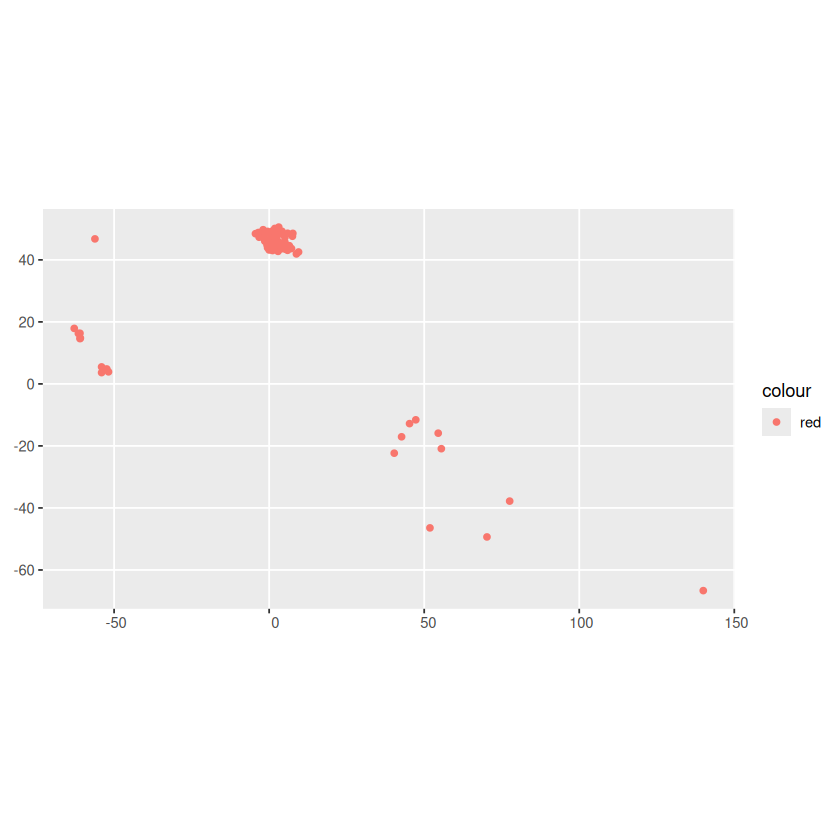

In [33]:

my_sf <- st_as_sf(stations_df, coords = c('Longitude', 'Latitude'))

#my_sf <- st_set_crs(my_sf, crs = 4326)

#Plot it:

ggplot(my_sf) + 
  geom_sf(aes(color = 'red'))


[1] "sf"         "data.frame"

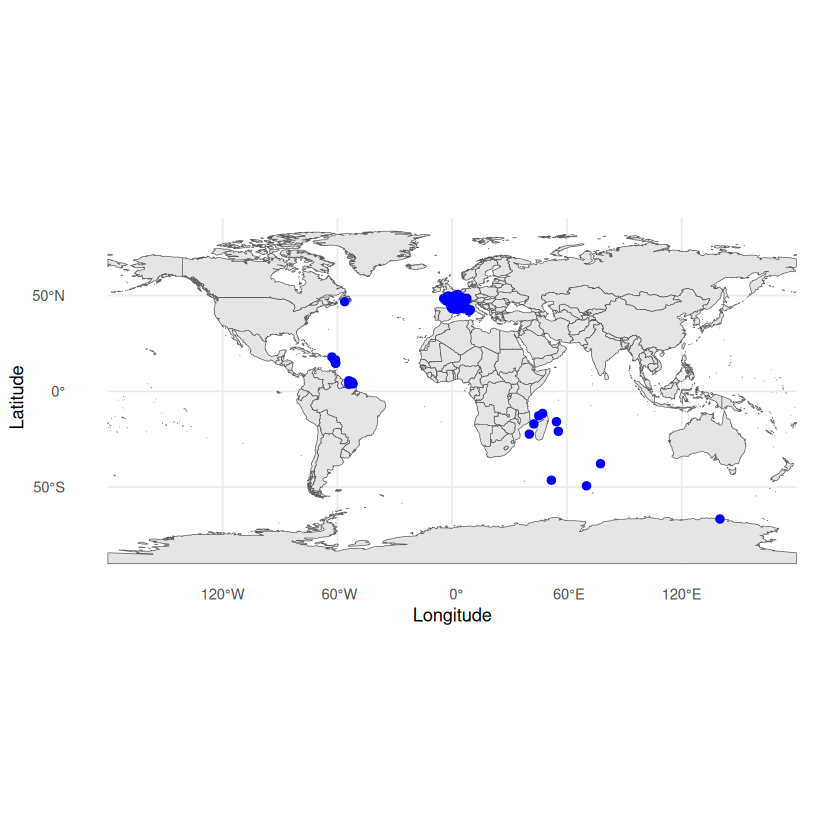

In [ ]:

world <- ne_countries(scale = "medium", returnclass = "sf")
class(world)


ggplot() +
  geom_sf(data = world) +
  geom_point(data = stations_df, aes(x = Longitude, y = Latitude), color = "blue", size = 2) +
  coord_sf() +
  theme_minimal()